In [ ]:
import pandas as pd
df=pd.read_csv('./통합 업체별 명세서 주요정보.csv',encoding='cp949')
df.columns

Index(['번호', '관장기관', '법인명', '대상년도', '지정구분', '지정업종', '온실가스 배출량(tCO₂eq)',
       '에너지 사용량(TJ)', '검증수행기관', '비고'],
      dtype='object')

In [ ]:
df.head()

,번호,관장기관,법인명,대상년도,지정구분,지정업종,온실가스 배출량(tCO₂eq),에너지 사용량(TJ),검증수행기관,비고
0,1,국토교통부,(주)강원랜드,2011,업체,건물,"70,829","1,301",한국표준협회,NaN
1,2,국토교통부,(주)경기고속,2011,업체,교통(여객),"167,188","2,540",(주)한국경영인증원,NaN
2,3,국토교통부,(주)대명레저산업,2011,사업장,건물,"49,618",955,한국표준협회,NaN
3,4,국토교통부,(주)대원고속,2011,업체,교통(여객),"152,566","2,277",(주)한국경영인증원,NaN
4,5,국토교통부,(주)무주덕유산리조트,2011,사업장,건물,"27,636",465,이큐에이㈜,NaN


In [ ]:
df.rename(columns = {'온실가스 배출량(tCO₂eq)':'tCO2', '에너지 사용량(TJ)':'TJ'}, inplace = True)
df

,번호,관장기관,법인명,대상년도,지정구분,지정업종,tCO2,TJ,검증수행기관,비고
0,1,국토교통부,(주)강원랜드,2011,업체,건물,"70,829","1,301",한국표준협회,NaN
1,2,국토교통부,(주)경기고속,2011,업체,교통(여객),"167,188","2,540",(주)한국경영인증원,NaN
2,3,국토교통부,(주)대명레저산업,2011,사업장,건물,"49,618",955,한국표준협회,NaN
3,4,국토교통부,(주)대원고속,2011,업체,교통(여객),"152,566","2,277",(주)한국경영인증원,NaN
4,5,국토교통부,(주)무주덕유산리조트,2011,사업장,건물,"27,636",465,이큐에이㈜,NaN
...,...,...,...,...,...,...,...,...,...,...
8371,8372,환경부,효성첨단소재 주식회사,2020,업체,산업,"191,050","3,883",(재)한국품질재단,NaN
8372,8373,환경부,효성티앤씨 주식회사,2020,업체,산업,"323,533","7,495",(재)한국품질재단,NaN
8373,8374,환경부,효성화학 주식회사,2020,업체,산업,"881,811","18,213",(재)한국품질재단,NaN
8374,8375,환경부,휴비스,2020,업체,산업,"465,138","6,985",한국표준협회,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8376 entries, 0 to 8375
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      8376 non-null   int64 
 1   관장기관    8376 non-null   object
 2   법인명     8376 non-null   object
 3   대상년도    8376 non-null   int64 
 4   지정구분    8376 non-null   object
 5   지정업종    8376 non-null   object
 6   tCO2    8305 non-null   object
 7   TJ      8305 non-null   object
 8   검증수행기관  8306 non-null   object
 9   비고      29 non-null     object
dtypes: int64(2), object(8)
memory usage: 654.5+ KB


In [ ]:
df_co2=df[(df['tCO2'] == '******')&(df['tCO2'] == '*****')].index
df_e=df[(df['TJ'] == '******')&(df['TJ'] == '*****')].index

In [ ]:
df2=df.drop(df_co2)
df2=df.drop(df_e)

In [ ]:
df_feature=df2[['지정업종','tCO2','TJ']]
# df_feature=df[['tCO2','TJ']]

In [ ]:
df_feature = df_feature.dropna(axis=0)

In [ ]:
# pd.set_option('display.max_rows', None)

In [ ]:
df_feature

,지정업종,tCO2,TJ
0,건물,"70,829","1,301"
1,교통(여객),"167,188","2,540"
2,건물,"49,618",955
3,교통(여객),"152,566","2,277"
4,건물,"27,636",465
...,...,...,...
8371,산업,"191,050","3,883"
8372,산업,"323,533","7,495"
8373,산업,"881,811","18,213"
8374,산업,"465,138","6,985"


In [ ]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8305 entries, 0 to 8375
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지정업종    8305 non-null   object
 1   tCO2    8305 non-null   object
 2   TJ      8305 non-null   object
dtypes: object(3)
memory usage: 259.5+ KB


# 데이터 전처리

In [ ]:
df_feature['tCO2']=df_feature.tCO2.str.replace(',','')

In [ ]:
# # df_feature['tCO2']=df_feature[df_feature['tCO2'] != 'n/a']
df_feature=df_feature[df_feature.tCO2 != '******']
df_feature=df_feature[df_feature.tCO2 != '*****']
df_feature['tCO2']=pd.to_numeric(df_feature['tCO2'])
# df_feature['tCO2']

In [ ]:
df_feature['TJ']=df_feature.TJ.str.replace(',','')
# df_feature['TJ']=df_feature[df_feature['TJ'] != 'n/a']
df_feature=df_feature[df_feature.TJ != '******']
df_feature=df_feature[df_feature.TJ != '*****']
df_feature['TJ']=pd.to_numeric(df_feature['TJ'])
# df_feature['TJ']

In [ ]:
df_feature = df_feature.dropna(axis=0)

In [ ]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8275 entries, 0 to 8375
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지정업종    8275 non-null   object
 1   tCO2    8275 non-null   int64 
 2   TJ      8275 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 258.6+ KB


In [ ]:
dfx_induty=pd.get_dummies(df_feature['지정업종'])
dfx_induty

,건물,건설,공공기타,광업,교통(여객),교통(철도),교통(항공),교통(해운),교통(화물),기계,담배제조업,디스플레이,목재,반도체,반도체.디스플레이.전기전자,발전 · 에너지,발전에너지,비철금속,산업,산업단지,석유화학,섬유,수도,수도사업,수송,시멘트,식료품 제조업,요업,유리,유리 · 요업,음료제조업,음식료품,자동차,전기전자,전환,정유,제지,조선,지정외 폐기물처리업,지정외 폐기물처리업 등,집단에너지,철강,통신,폐기물,"하수, 폐수 및 분뇨 처리업",하수처리업,항공
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8372,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8373,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8374,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
scaler.fit(dfx_induty)
dfx_induty=scaler.transform(dfx_induty)

# 군집분석 (KMeans)

## Make model (train and prediction)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model=KMeans(n_clusters=47,random_state=0,algorithm='auto')

In [ ]:
model.fit(dfx_induty)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=47, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
model.labels_

array([4, 8, 4, ..., 2, 2, 2], dtype=int32)

In [ ]:
df_feature['지정업종']=model.labels_

In [ ]:
pred = pd.DataFrame(model.predict(dfx_induty))
pred.columns=['pred']

# concatenate labels to df as a new column
r = pd.concat([df_feature,pred],axis=1)
r = r.dropna()

In [ ]:
r

,지정업종,tCO2,TJ,pred
0,4.0,70829.0,1301.0,4.0
1,8.0,167188.0,2540.0,8.0
2,4.0,49618.0,955.0,4.0
3,8.0,152566.0,2277.0,8.0
4,4.0,27636.0,465.0,4.0
...,...,...,...,...
8270,36.0,1135421.0,22174.0,2.0
8271,2.0,24540.0,495.0,2.0
8272,2.0,124161.0,2446.0,2.0
8273,36.0,5442966.0,108023.0,2.0


## Visualize result

In [ ]:
import matplotlib.pyplot as plt

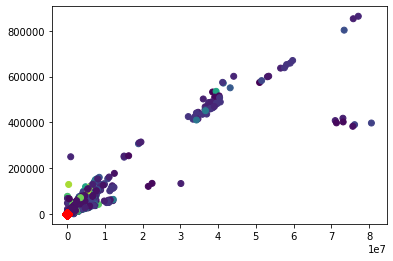

In [ ]:
centers = pd.DataFrame(model.cluster_centers_)
center_x = centers[0]
center_y = centers[1]

# scatter plot
plt.scatter(r['tCO2'],r['TJ'],c=r['pred'])
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

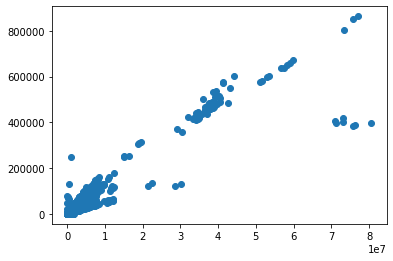

In [ ]:
plt.scatter(x='tCO2',y='TJ',data=df_feature)

In [ ]:
import scipy as sp

In [ ]:
points = df_feature[['tCO2', 'TJ','지정업종']]
points.head()

,tCO2,TJ,지정업종
0,70829,1301,4
1,167188,2540,8
2,49618,955,4
3,152566,2277,8
4,27636,465,4


In [ ]:
centroids = points.sample(47, random_state=0)
centroids

,tCO2,TJ,지정업종
3148,18457,376,12
7298,36306,713,12
6602,758628,8530,28
5606,10783311,50564,21
6624,52164,121,1
7979,66811,911,4
2815,51645,166,15
6709,50621,1016,0
1147,71237,2363,24
2639,7806,154,20


In [ ]:
import numpy as np

In [ ]:
# 각 데이터에 대하여, 각 중심점과의 유클리드 거리 계산
distance = sp.spatial.distance.cdist(points, centroids, 'euclidean')

# 가장 거리가 짧은 중심점의 cluster로 할당
cluster_num = np.argmin(distance, axis=1)

# 결과 확인
result = points.copy()
result['cluster'] = np.array(cluster_num)

In [ ]:
result.head()

,tCO2,TJ,지정업종,cluster
0,70829,1301,4,26
1,167188,2540,8,22
2,49618,955,4,7
3,152566,2277,8,22
4,27636,465,4,18


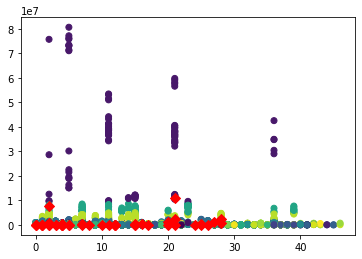

In [ ]:
center_x = centroids['지정업종']
center_y = centroids['tCO2']

plt.scatter(x='지정업종', y='tCO2', c='cluster', data=result)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

In [ ]:
centroids_2 = result.groupby('cluster').mean()
centroids_2

,tCO2,TJ,지정업종
cluster,,,
0,1.878473e+04,366.319728,10.768707
1,3.764953e+04,697.255319,9.872340
2,8.331006e+05,13210.750000,10.821429
3,3.386896e+07,358972.319588,14.876289
4,5.409263e+04,856.028571,9.828571
5,6.598922e+04,1137.127273,10.290909
6,5.163558e+04,730.875000,11.666667
7,5.045703e+04,900.810345,8.275862
8,7.221871e+04,1286.678571,11.785714


In [ ]:
# 각 데이터에 대하여, 각 중심점과의 유클리드 거리 계산
distance2 = sp.spatial.distance.cdist(points, centroids_2, 'euclidean')

# 가장 거리가 짧은 중심점의 cluster로 할당
cluster_num2 = np.argmin(distance2, axis=1)

# 결과 확인
result2 = points.copy()
result2['cluster2'] = np.array(cluster_num2)

In [ ]:
result2.head()

,tCO2,TJ,지정업종,cluster2
0,70829,1301,4,26
1,167188,2540,8,22
2,49618,955,4,7
3,152566,2277,8,29
4,27636,465,4,18


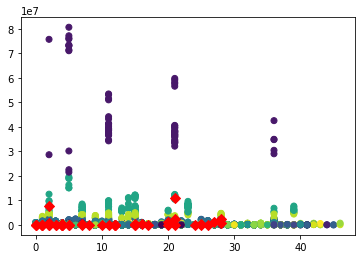

In [ ]:
center_x = centroids['지정업종']
center_y = centroids['tCO2']

plt.scatter(x='지정업종', y='tCO2', c='cluster2', data=result2)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()